In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
data = pd.read_csv("mnist_train.csv")
data.head() # 784 inputs

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data = np.array(data)
m, n = data.shape # m is the number of rows, n is the number features
np.random.shuffle(data) # shuffle before splitting into test and training sets

data_test = data[0:1000].T # transpose the data (flip it so that each column is an example)
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255. # normalize data value to between 0 and 1

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [17]:
#X_train[:, 0].shape # first column features

In [18]:
def init_params():
    # bias and weights
    # 784 inputs to 256 hidden nodes of the 1st hidden layer
    w1 = np.random.randn(256, 784) * 0.05 # generate random values between -0.5 to 0.5
    b1 = np.random.randn(256, 1) * 0.05
    
    # 256 hidden nodes of the 1st hidden layer to 256 hidden nodes of the 2nd hidden layer
    w2 = np.random.randn(256, 256) * 0.05 # generate random values between -0.5 to 0.5
    b2 = np.random.randn(256, 1) * 0.05
    
    # 256 hidden nodes of the 2nd hidden layer to 10 outputs
    w3 = np.random.randn(10, 256) * 0.05 # generate random values between -0.5 to 0.5
    b3 = np.random.randn(10, 1) * 0.05
    
    return w1, b1, w2, b2, w3, b3

In [19]:
def ReLU(z):
    return np.maximum(0, z)

def softmax(z):
    z -= np.max(z, axis=0)  # subtract max value for numerical stability
    a = np.exp(z) / np.sum(np.exp(z), axis=0)
    return a

def deriv_ReLU(z):
    return z > 0

def onehot_encode(Y):
    onehot_Y = np.zeros((Y.size, Y.max() + 1)) # create correctly sized matrix
    onehot_Y[np.arange(Y.size), Y] = 1 # for each rows, go to the column specified by label in Y and set it to 1
    onehot_Y = onehot_Y.T # flip it to make each column to be an example
    return onehot_Y

In [20]:
def forward_prop(w1, b1, w2, b2, w3, b3, X):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)

    z2 = w2.dot(a1) + b2
    a2 = ReLU(z2)

    z3 = w3.dot(a2) + b3
    a3 = softmax(z3)
    
    return z1, a1, z2, a2, z3, a3

def backward_prop(z1, a1, z2, a2, z3, a3, w1, w2, w3, X, Y):
    m = Y.size
    onehot_Y = onehot_encode(Y)
    
    dz3 = a3 - onehot_Y
    dw3 = 1 / m * dz3.dot(a2.T)
    db3 = 1 / m * np.sum(dz3)
    
    dz2 = w3.T.dot(dz3) * deriv_ReLU(z2)
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    
    dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
    dw1 = 1 / m * dz1.dot(X.T)
    db1 = 1 / m * np.sum(dz1)
    
    return dw1, db1, dw2, db2, dw3, db3

In [21]:
def update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    
    w3 = w3 - alpha * dw3
    b3 = b3 - alpha * db3
    
    return w1, b1, w2, b2, w3, b3

In [22]:
def get_predictions(a3):
    # get max value of the class with the highest probability
    return np.argmax(a3, 0) 

def get_accuracy(predictions, Y):
    # getting the number of correct predictions and divide by size of label to get accuracy on set
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2, w3, b3 = init_params()
    
    for i in range(iterations):
        z1, a1, z2, a2, z3, a3 = forward_prop(w1, b1, w2, b2, w3, b3, X)
        dw1, db1, dw2, db2, dw3, db3 = backward_prop(z1, a1, z2, a2, z3, a3, w1, w2, w3, X, Y)
        w1, b1, w2, b2, w3, b3 = update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha)
        
        if i % 50 == 0 or i == iterations - 1: # every 50th iteration
            print(f"Iteration: {i}")
            print(f"Accuracy: {get_accuracy(get_predictions(a3), Y)}")
            
    return w1, b1, w2, b2, w3, b3

In [23]:
w1, b1, w2, b2, w3, b3 = gradient_descent(X_train, Y_train, 500, 0.25)

Iteration: 0
Accuracy: 0.1338048780487805
Iteration: 50
Accuracy: 0.8733170731707317
Iteration: 100
Accuracy: 0.9111219512195122
Iteration: 150
Accuracy: 0.9229512195121952
Iteration: 200
Accuracy: 0.9321463414634147
Iteration: 250
Accuracy: 0.9397073170731707
Iteration: 300
Accuracy: 0.9452195121951219
Iteration: 350
Accuracy: 0.9503170731707317
Iteration: 400
Accuracy: 0.9550975609756097
Iteration: 450
Accuracy: 0.9586585365853658
Iteration: 499
Accuracy: 0.9618292682926829


In [24]:
def make_predictions(X, w1, b1, w2, b2, w3, b3):
    _, _, _, _, _, a3 = forward_prop(w1, b1, w2, b2, w3, b3, X)
    predictions = get_predictions(a3)
    return predictions

def test_prediction(index, w1, b1, w2, b2, w3, b3):
    current_image = X_train[:, index, None] # selecting column at index and turning the column into a 2d array
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2, w3, b3)
    label = Y_train[index]
    
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  4
Label:  4


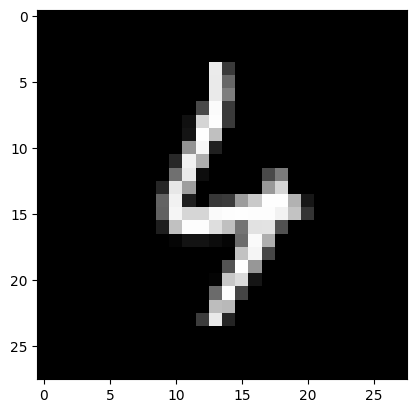

Prediction:  1
Label:  1


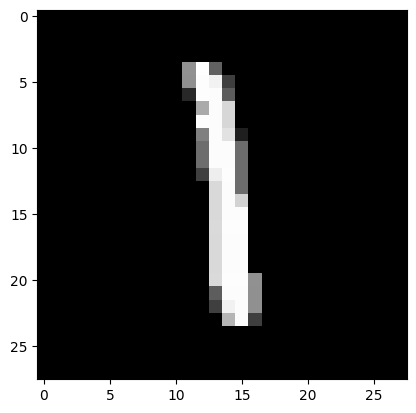

Prediction:  9
Label:  9


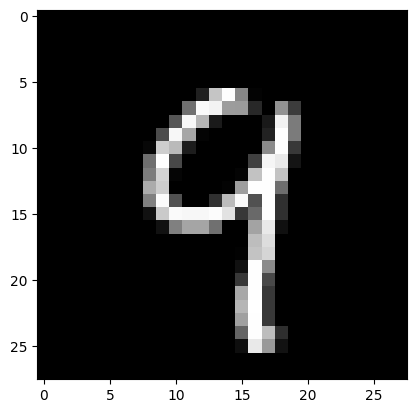

Prediction:  8
Label:  8


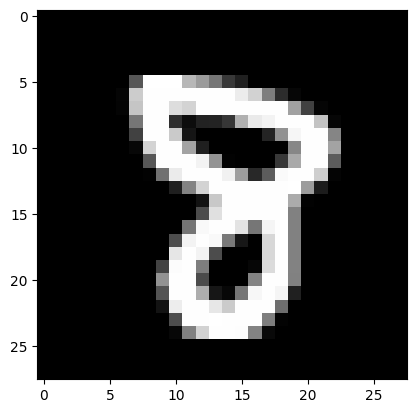

Prediction:  9
Label:  9


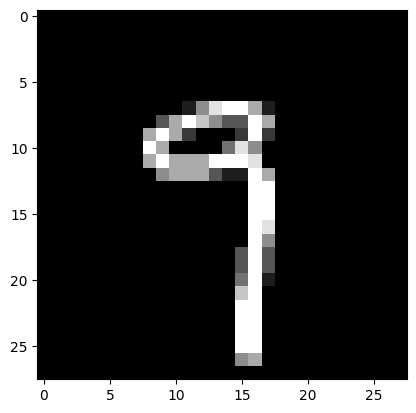

Prediction:  4
Label:  4


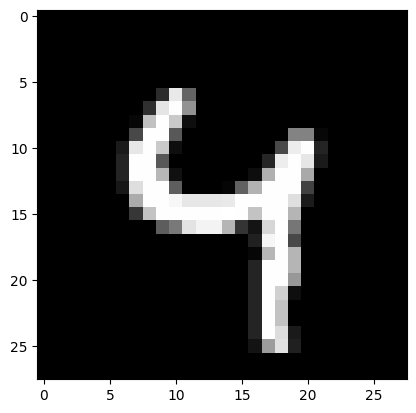

Prediction:  9
Label:  9


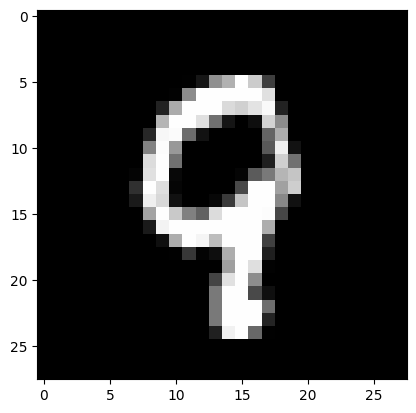

In [25]:
test_prediction(1, w1, b1, w2, b2, w3, b3)
test_prediction(2, w1, b1, w2, b2, w3, b3)
test_prediction(3, w1, b1, w2, b2, w3, b3)
test_prediction(58, w1, b1, w2, b2, w3, b3)

test_prediction(100, w1, b1, w2, b2, w3, b3)
test_prediction(101, w1, b1, w2, b2, w3, b3)
test_prediction(102, w1, b1, w2, b2, w3, b3)

In [32]:
test_predictions = make_predictions(X_test, w1, b1, w2, b2, w3, b3)
print(f"Accuracy on test dataset: {get_accuracy(test_predictions, Y_test)}")

[6 6 6 9 1 1 7 4 7 1 6 6 2 7 5 3 5 7 4 2 1 3 5 2 1 9 7 5 1 6 8 8 7 8 5 0 7
 0 9 9 5 0 6 2 5 5 3 6 5 5 7 1 3 9 9 8 2 0 2 2 9 4 8 1 4 7 3 4 5 4 1 4 0 6
 9 4 2 8 0 8 2 0 4 6 1 1 3 2 0 1 2 7 7 6 1 2 6 5 1 5 0 7 9 4 0 6 8 7 6 5 1
 0 0 4 0 1 9 3 5 7 3 1 8 8 7 8 7 0 9 1 2 1 8 6 4 7 9 5 6 3 1 3 0 5 0 8 3 0
 9 0 8 2 8 2 0 5 0 8 5 5 1 4 2 9 1 5 0 4 0 9 7 5 3 0 5 8 4 1 4 3 2 5 4 8 0
 3 6 4 9 1 2 4 6 3 7 7 2 9 3 6 4 9 9 3 2 1 2 2 5 3 0 0 2 9 3 2 0 7 7 9 0 8
 1 6 5 7 1 1 6 8 5 0 7 2 5 4 6 6 9 5 8 4 3 8 0 4 9 2 9 5 9 3 7 4 8 1 1 0 9
 5 5 6 5 9 3 5 2 5 6 5 4 6 5 0 9 1 3 3 8 7 9 4 2 4 2 3 3 8 5 6 5 9 6 3 6 2
 0 4 2 5 1 6 4 6 1 6 1 7 4 3 5 4 7 6 5 3 0 0 6 5 8 8 0 6 7 1 0 1 4 2 3 8 7
 3 5 2 3 0 5 3 8 5 1 3 8 8 9 0 2 6 8 1 9 6 8 8 3 2 0 9 3 3 9 1 5 5 1 6 8 5
 5 1 1 5 7 2 5 9 7 4 0 3 2 2 5 1 7 6 4 1 6 7 0 5 5 9 6 9 7 3 2 1 2 1 3 9 0
 2 6 9 3 4 7 8 4 3 6 5 2 2 1 3 2 5 5 8 4 6 1 6 3 0 6 1 9 0 9 7 3 3 2 8 5 6
 4 3 9 9 7 0 0 2 7 8 5 5 3 9 2 4 3 7 7 7 8 4 5 0 9 8 1 3 9 6 6 5 1 9 9 1 1
 2 9 6 0 7 2 7 7 3 0 7 2 

In [27]:
test_set = pd.read_csv("mnist_test.csv")
test_set.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
test_set = np.array(test_set)
test_set = test_set.T
test_set = test_set / 255.

In [33]:
test_predictions = make_predictions(test_set, w1, b1, w2, b2, w3, b3)
print(test_predictions)

[2 0 9 ... 3 9 2]


In [38]:
df = pd.DataFrame({
    "ImageId" : range(1, len(test_predictions) + 1),
    "Label" : test_predictions
})

df.to_csv("predictions.csv", index=False)

In [39]:
df = pd.read_csv("predictions.csv")
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
